In [1]:
import os
import typing
from typing import List, Tuple, Dict
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
%cd "/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos"

Mounted at /content/drive
/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos


In [2]:
def calling_audios(data_path:str)->List[str]:
    '''
        Cargando los nombres de los audios
    '''
    names = list()
    for dirname, _, filenames in os.walk(data_path):
        for filename in filenames:
            names.append(filename)
    return names

In [3]:
data_path_train = '/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos/IRMAS-Sample/Training'

In [4]:
training_names = calling_audios(data_path_train)

In [5]:
# Audio Numbers
print("Number of total audios: ")
print(len(training_names))

print("Name Example: ")
print(training_names[0])

Number of total audios: 
3
Name Example: 
001__[vio][nod][cou_fol]2194__1.wav


### Zero Crossing Rate


Número de veces que la señal cruza el 0.

\begin{equation}
  zcr = \dfrac{1}{T-1}\displaystyle \sum_{t=1}^{T-1} 1 \mathbb{R}_{<0}(s_{t},s_{t-1})
\end{equation}

donde $s$ es la señal, $T$ es el largo de la señal y $1 \mathbb{R}_{<0}$ es una función indicadora.

In [6]:
help(librosa.feature.zero_crossing_rate)

Help on function zero_crossing_rate in module librosa.feature.spectral:

zero_crossing_rate(y: numpy.ndarray, *, frame_length: int = 2048, hop_length: int = 512, center: bool = True, **kwargs: Any) -> numpy.ndarray
    Compute the zero-crossing rate of an audio time series.
    
    Parameters
    ----------
    y : np.ndarray [shape=(..., n)]
        Audio time series. Multi-channel is supported.
    frame_length : int > 0
        Length of the frame over which to compute zero crossing rates
    hop_length : int > 0
        Number of samples to advance for each frame
    center : bool
        If `True`, frames are centered by padding the edges of ``y``.
        This is similar to the padding in `librosa.stft`,
        but uses edge-value copies instead of zero-padding.
    **kwargs : additional keyword arguments to pass to `librosa.zero_crossings`
    threshold : float >= 0
        If specified, values where ``-threshold <= y <= threshold`` are
        clipped to 0.
    ref_magnitude 

In [7]:
hop_length = 512  #tamaño del overlap
frame_length = 1024 # cantidad de frames por sumar

In [8]:
y, sr = librosa.load(data_path_train+'/sax/118__[sax][nod][jaz_blu]1702__3.wav',sr=22050)

In [9]:
librosa.feature.zero_crossing_rate(y,hop_length=hop_length,frame_length=frame_length).shape

(1, 130)

In [10]:
zcr = librosa.feature.zero_crossing_rate(y,hop_length=hop_length,frame_length=frame_length)[0]

In [11]:
len(zcr)

130

In [12]:
frames = range(len(zcr))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

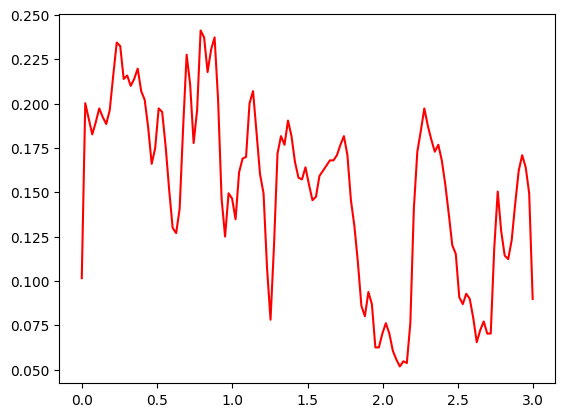

In [13]:
plt.plot(t,zcr, color = "r")
plt.show()